---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 1 

---

Please write your full name here
- **Name** : "Ehab Kamal Soliman"

## Introduction to Machine Learning
For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Question 0

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [3]:
def answer_zero():
    # write your answer code here to question 0
    return len(cancer['feature_names']) # Return your answer
answer_zero()

30

### Question 1
Pandas dataframes are much easier and more interpretable when dealing with tables. **Convert the cancer data into dataframe.**

Note: Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training any model.

*This function should return a (569, 31) DataFrame with *

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']
    
*and index = *

RangeIndex(start=0, stop=569, step=1)

In [4]:
def answer_one():
    
    # Your code here
    df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
    df['target'] = cancer['target']
    return df# Return your answer


answer_one().head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

In [5]:
def answer_two():
    cancerdf = answer_one()
    # Your code here
    # benign = 1 , malignant = 0
    benign = len(cancerdf[cancerdf['target'] == 1])
    malignant = len(cancerdf) - benign
    return {"malignant":malignant , "benign":benign} # Return your answer


answer_two()

{'malignant': 212, 'benign': 357}

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

In [6]:
def answer_three():
    cancerdf = answer_one()
    # Your code here
    X = cancerdf.iloc[:,:-1]
    y = cancerdf.iloc[:,-1]
    return X, y

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets

In [7]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    # Your code here
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    
    
    return X_train, X_test, y_train, y_test

### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train`.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    # Your code here
    model = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
    model.fit(X_train,y_train)
    return model # Return your answer

### Question 6
Using your knn classifier, predict the class label using the median value for each feature.

In [9]:
def answer_six():
    cancerdf = answer_one()  
    # Your code here
    model = answer_five()
    X = [cancerdf.iloc[:,:-1].median()]
    prediction = model.predict(X)[0]
    if prediction == 1:
      return "Benign"
    else:
      return "Malignant"
answer_six()

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Benign'

### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

In [10]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    # Your code here
    y_pred = knn.predict(X_test)
    
    return y_pred # Return your answer

### Question 8
Find the score (accuracy) of your knn classifier using `X_test` and `y_test` & `X_train` and `y_train`. 
- Is the training accuracy higher or lower that the testing accuracy? 
    - the training score is higher than the test score
- According to the test accuracy, would this model generalize well to new inputs?
    - yes, because its test score is near its training score

In [11]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    # Your code here
    training_score = knn.score(X=X_train,y=y_train)
    test_score = knn.score(X=X_test,y=y_test)
    return {"training_score":training_score,"test_score":test_score} # Return your answer

answer_eight()

{'training_score': 0.9494505494505494, 'test_score': 0.9385964912280702}

### Question 9
##### Accuracy Plot
* Create `mal_train_X`, `mal_train_y`,`ben_train_X`,`ben_train_y`, `mal_test_X`,`mal_test_y`, `ben_test_X` and `ben_test_y` portions of the dataset. Where `mal_train_X` contains all training samples that belongs to malignant class while `mal_train_y` contains all labels of the samples that belongs to malignant class, and so on for other variables.

* Calculate Accuracy scores for each case and save all the results in a list called `scores` using knn model from question 5.

Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

In [12]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    # %matplotlib inline

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    
    # #################################################################################
    # ###################### Write your code here #####################################
    # #################################################################################
    
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [
        knn.score(mal_train_X,mal_train_y),
        knn.score(ben_train_X,ben_train_y),
        knn.score(mal_test_X,mal_test_y),
        knn.score(ben_test_X,ben_test_y)
    ]
    

    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

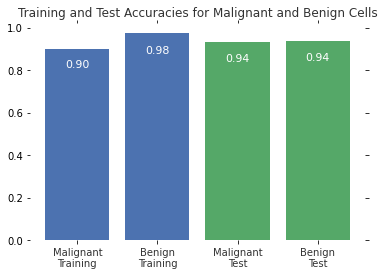

In [13]:
accuracy_plot() 

### Question 10
1. Load Iris dataset from sklearn.
2. Split the data into training and testing (30% testing)
3. Create scatter plot.
4. From the scatter plot choose two features only to train a knn model with suitable "k" of your choice.
5. Evaluate your model performance and comment on your results.

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [15]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
X = pd.DataFrame(iris['data'],columns=iris['feature_names'])
y = pd.Series(iris['target'])
df = X
df['class'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)

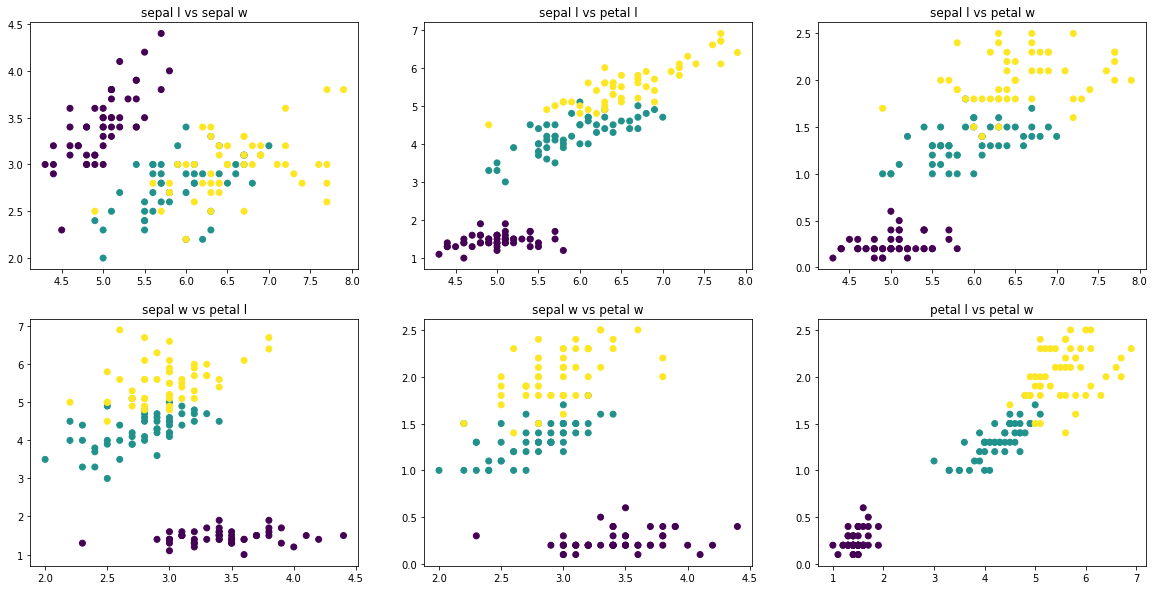

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=df['class'])
plt.title("sepal l vs sepal w")
plt.subplot(2,3,2)
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'],c=df['class'])
plt.title("sepal l vs petal l")
plt.subplot(2,3,3)
plt.scatter(df['sepal length (cm)'],df['petal width (cm)'],c=df['class'])
plt.title("sepal l vs petal w")
plt.subplot(2,3,4)
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['class'])
plt.title("sepal w vs petal l")
plt.subplot(2,3,5)
plt.scatter(df['sepal width (cm)'],df['petal width (cm)'],c=df['class'])
plt.title("sepal w vs petal w")
plt.subplot(2,3,6)
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],c=df['class'])
plt.title("petal l vs petal w")
plt.show()

### from the scatter plots above, it seems like "petal length (cm)" and "petal width (cm)" would be good choice for the knn model 

In [19]:
X_train.drop(columns=['sepal length (cm)','sepal width (cm)'],inplace=True)
X_test.drop(columns=['sepal length (cm)','sepal width (cm)'],inplace=True)
X_train.head()

,petal length (cm),petal width (cm),class
60,3.5,1.0,1
116,5.5,1.8,2
144,5.7,2.5,2
119,5.0,1.5,2
108,5.8,1.8,2


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


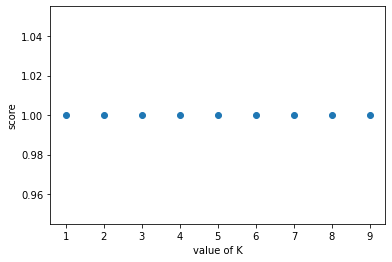

In [20]:
# choosing the value of K
scores =[]
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
print(scores)
plt.scatter(range(1,10), scores)
plt.xlabel("value of K")
plt.ylabel("score")
plt.show()

### All values of k guarantee a score of 1! So i will stick to the default value where k=5

In [21]:
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(X_test)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### The model performs perfectly on the two chosen features